# Calories Prediction using Machine Learning

Here is all the data you need:
"calories.csv"

## Data loading

### Subtask:
Load the data from "calories.csv" into a pandas DataFrame.


**Reasoning**:
Load the data from "calories.csv" into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('calories.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'calories.csv' not found.")
    df = None # Assign None to df in case of error
except pd.errors.ParserError:
    print("Error: Could not parse 'calories.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


(15000, 9)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, including data types, missing values, and summary statistics.


**Reasoning**:
I need to explore the data types, missing values, descriptive statistics, unique value counts for categorical columns and correlation between numerical features.  I will also generate a heatmap of the correlation matrix.



             User_ID    Gender       Age    Height    Weight  Duration  \
User_ID     1.000000 -0.002724 -0.001051 -0.015768 -0.013304 -0.003443   
Gender     -0.002724  1.000000  0.002449  0.710653  0.783520  0.002901   
Age        -0.001051  0.002449  1.000000  0.009235  0.090343  0.009550   
Height     -0.015768  0.710653  0.009235  1.000000  0.958229 -0.004791   
Weight     -0.013304  0.783520  0.090343  0.958229  1.000000 -0.002615   
Duration   -0.003443  0.002901  0.009550 -0.004791 -0.002615  1.000000   
Heart_Rate -0.001576  0.011318  0.007203  0.000748  0.004012  0.846832   
Body_Temp   0.000266  0.007114  0.007231  0.001474  0.003308  0.911436   
Calories   -0.001888  0.022243  0.155823  0.018026  0.036051  0.954687   

            Heart_Rate  Body_Temp  Calories  
User_ID      -0.001576   0.000266 -0.001888  
Gender        0.011318   0.007114  0.022243  
Age           0.007203   0.007231  0.155823  
Height        0.000748   0.001474  0.018026  
Weight        0.004012   0.00

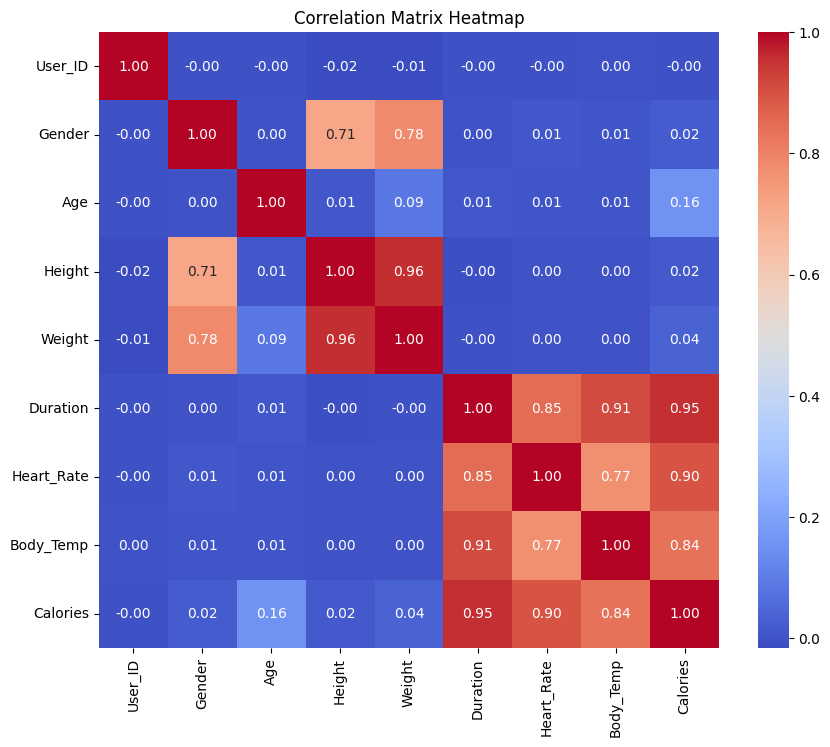

In [7]:
# Examine correlation between numerical features
correlation_matrix = df.corr()
print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Reasoning**:
The previous code failed due to a `ValueError` when calculating the correlation matrix because the 'Gender' column is of object type (string).  I will first convert the 'Gender' column to a numerical representation (e.g., 0 for 'female' and 1 for 'male') before calculating the correlation.



User_ID         int64
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64
            User_ID        Gender           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07      0.496467     42.789800    174.465133     74.966867   
std    2.872851e+06      0.500004     16.980264     14.258114     15.035657   
min    1.000116e+07      0.000000     20.000000    123.000000     36.000000   
25%    1.247419e+07      0.000000     28.000000    164.000000     63.000000   
50%    1.499728e+07      0.000000     39.000000    175.000000     74.000000   
75%    1.744928e+07      1.000000     56.000000    185.000000     87.000000   

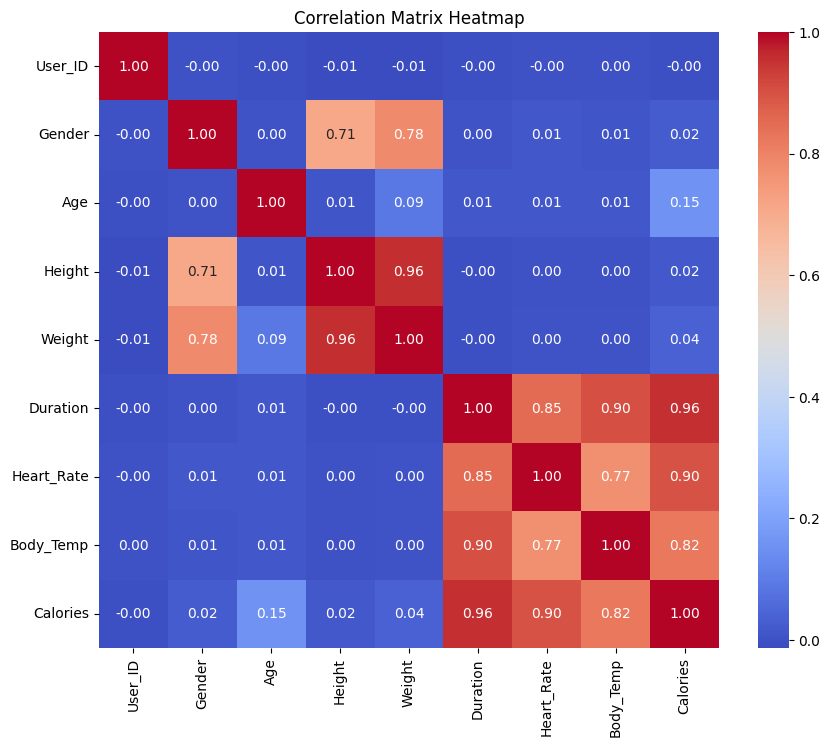

In [3]:
# Convert 'Gender' column to numerical representation
df['Gender'] = df['Gender'].map({'female': 0, 'male': 1})

# Check data types again
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Generate descriptive statistics for numerical columns
print(df.describe())

# Explore unique values for categorical columns (now numerical)
print(df['Gender'].value_counts())

# Examine correlation between numerical features
correlation_matrix = df.corr()
print(correlation_matrix)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data cleaning

### Subtask:
Identify and handle outliers in the dataset.


**Reasoning**:
Identify outliers in numerical features using box plots and handle them using IQR method.



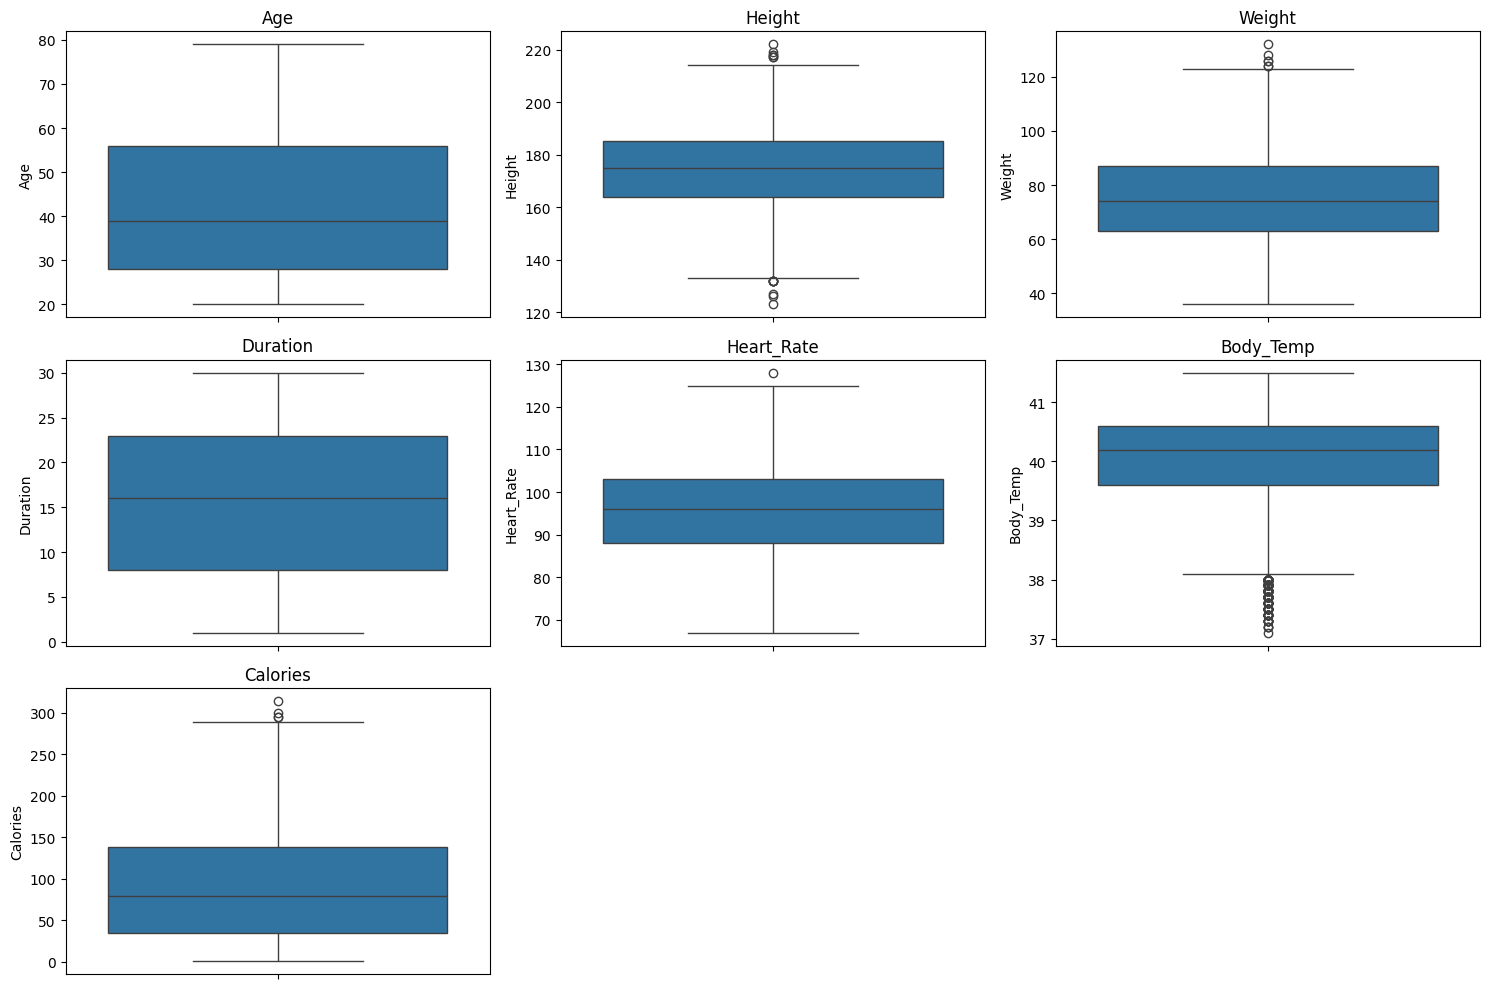

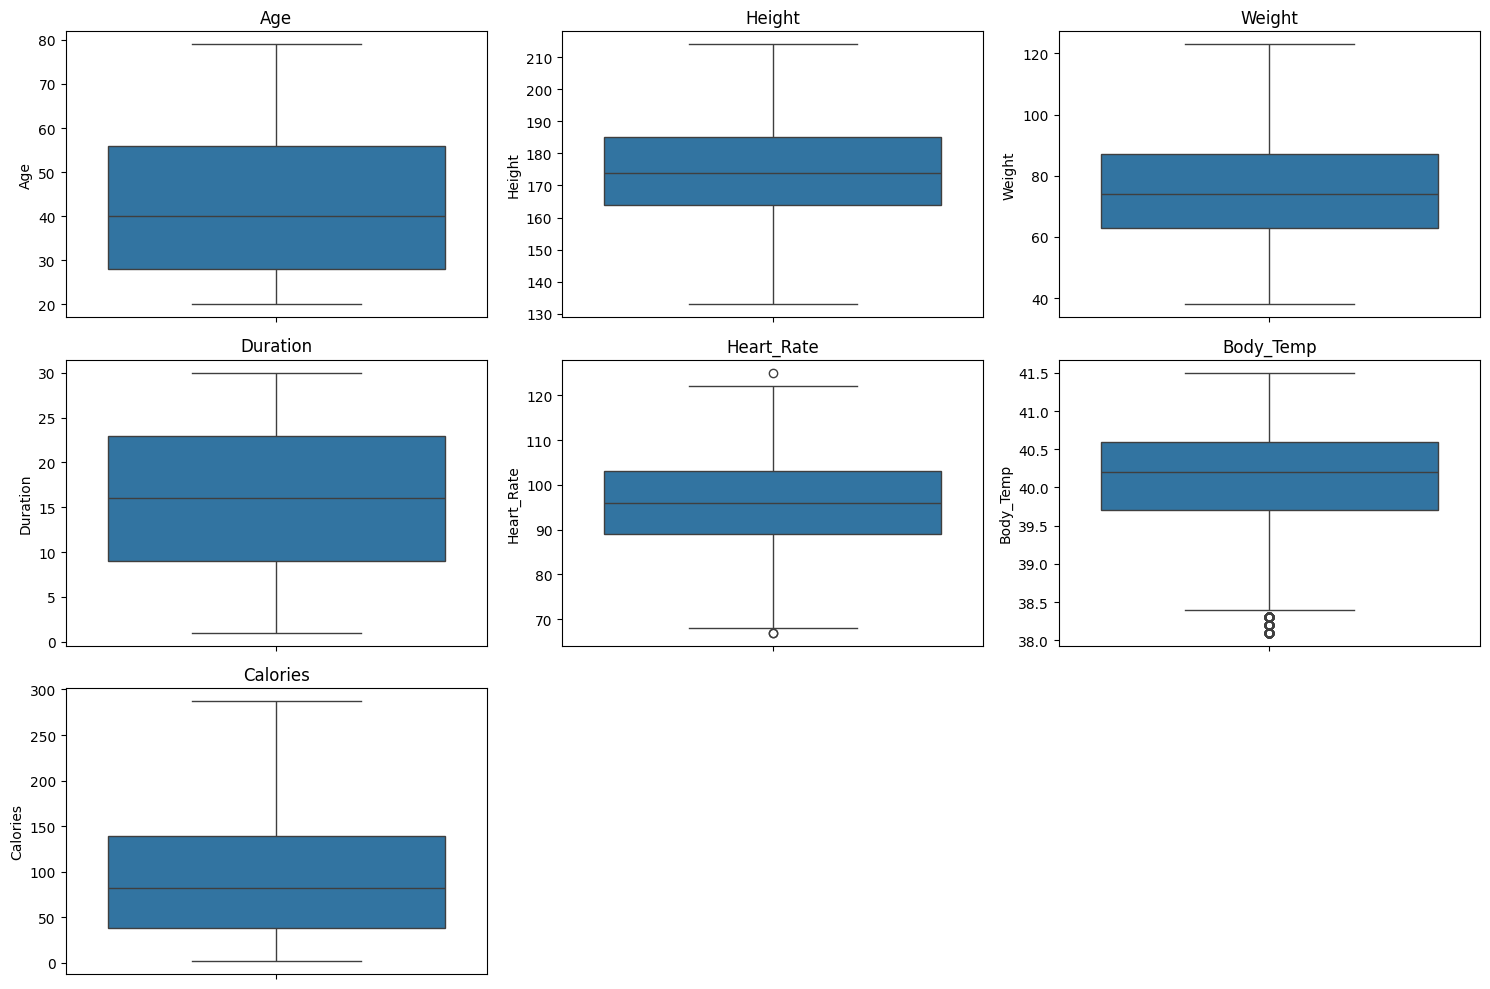

            User_ID        Gender           Age        Height        Weight  \
count  1.461100e+04  14611.000000  14611.000000  14611.000000  14611.000000   
mean   1.497953e+07      0.496407     42.817329    174.462802     74.961673   
std    2.874448e+06      0.500004     16.984229     14.186893     14.974673   
min    1.000116e+07      0.000000     20.000000    133.000000     38.000000   
25%    1.247125e+07      0.000000     28.000000    164.000000     63.000000   
50%    1.500483e+07      0.000000     40.000000    174.000000     74.000000   
75%    1.745151e+07      1.000000     56.000000    185.000000     87.000000   
max    1.999965e+07      1.000000     79.000000    214.000000    123.000000   

           Duration    Heart_Rate     Body_Temp      Calories  
count  14611.000000  14611.000000  14611.000000  14611.000000  
mean      15.883376     95.861406     40.081808     91.610499  
std        8.110054      9.400156      0.701310     61.649894  
min        1.000000     67.00000

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# Handle outliers using IQR method
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Re-examine descriptive statistics and visualizations
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

print(df.describe())

## Data analysis

### Subtask:
Perform descriptive statistics and correlation analysis.


**Reasoning**:
Calculate descriptive statistics and correlation analysis for the numerical features, focusing on the 'Calories' column.



In [5]:
# Calculate descriptive statistics
print(df.describe())

# Calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Analyze the correlation between 'Calories', 'Duration', and 'Heart_Rate'
calories_duration_correlation = correlation_matrix.loc['Calories', 'Duration']
calories_heart_rate_correlation = correlation_matrix.loc['Calories', 'Heart_Rate']

print(f"Correlation between Calories and Duration: {calories_duration_correlation}")
print(f"Correlation between Calories and Heart_Rate: {calories_heart_rate_correlation}")

#Further analysis and interpretation of the results
if abs(calories_duration_correlation) > 0.5:
    print("Calories and Duration have a strong correlation.")
elif abs(calories_duration_correlation) > 0.3:
    print("Calories and Duration have a moderate correlation.")
else:
    print("Calories and Duration have a weak correlation.")

if abs(calories_heart_rate_correlation) > 0.5:
    print("Calories and Heart_Rate have a strong correlation.")
elif abs(calories_heart_rate_correlation) > 0.3:
    print("Calories and Heart_Rate have a moderate correlation.")
else:
    print("Calories and Heart_Rate have a weak correlation.")

            User_ID        Gender           Age        Height        Weight  \
count  1.461100e+04  14611.000000  14611.000000  14611.000000  14611.000000   
mean   1.497953e+07      0.496407     42.817329    174.462802     74.961673   
std    2.874448e+06      0.500004     16.984229     14.186893     14.974673   
min    1.000116e+07      0.000000     20.000000    133.000000     38.000000   
25%    1.247125e+07      0.000000     28.000000    164.000000     63.000000   
50%    1.500483e+07      0.000000     40.000000    174.000000     74.000000   
75%    1.745151e+07      1.000000     56.000000    185.000000     87.000000   
max    1.999965e+07      1.000000     79.000000    214.000000    123.000000   

           Duration    Heart_Rate     Body_Temp      Calories  
count  14611.000000  14611.000000  14611.000000  14611.000000  
mean      15.883376     95.861406     40.081808     91.610499  
std        8.110054      9.400156      0.701310     61.649894  
min        1.000000     67.00000

## Data visualization

### Subtask:
Visualize the relationships between variables and identify patterns.


**Reasoning**:
Visualize the relationships between variables using scatter plots, histograms, box plots, and a pairplot as requested in the subtask.



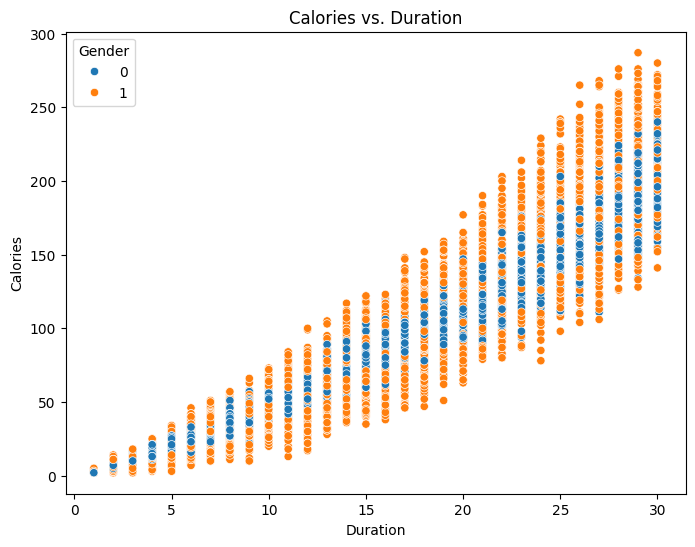

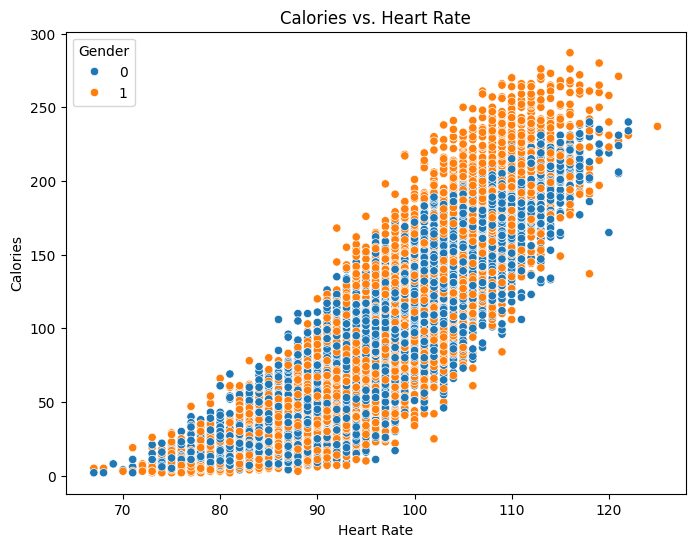

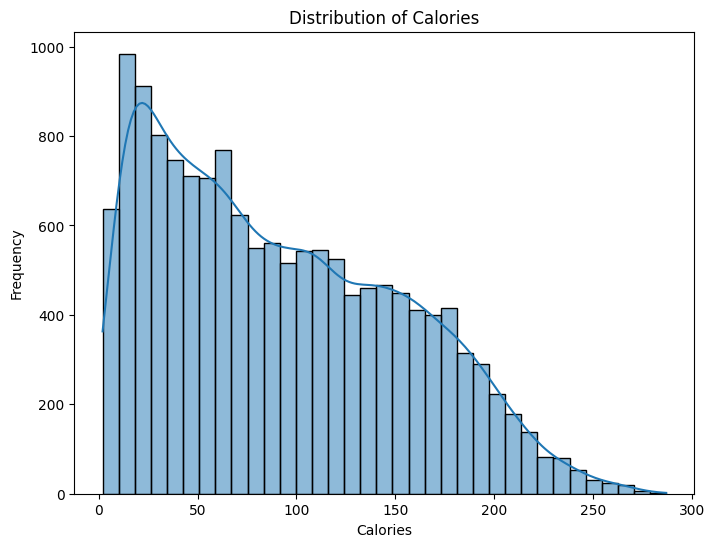

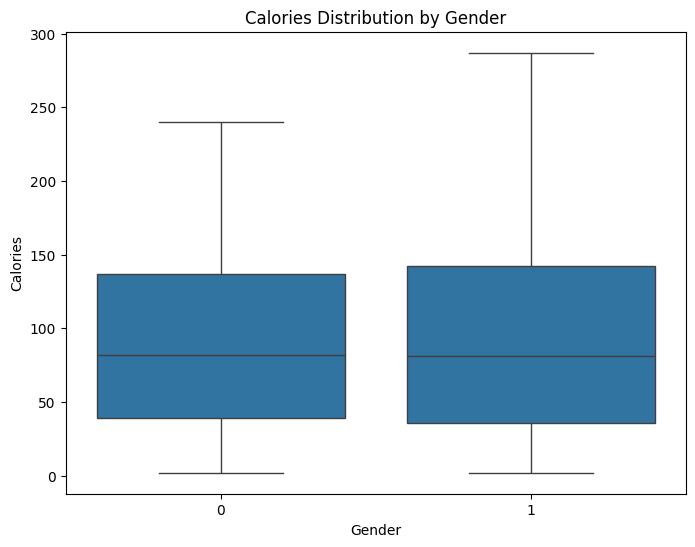

<Figure size 1200x1000 with 0 Axes>

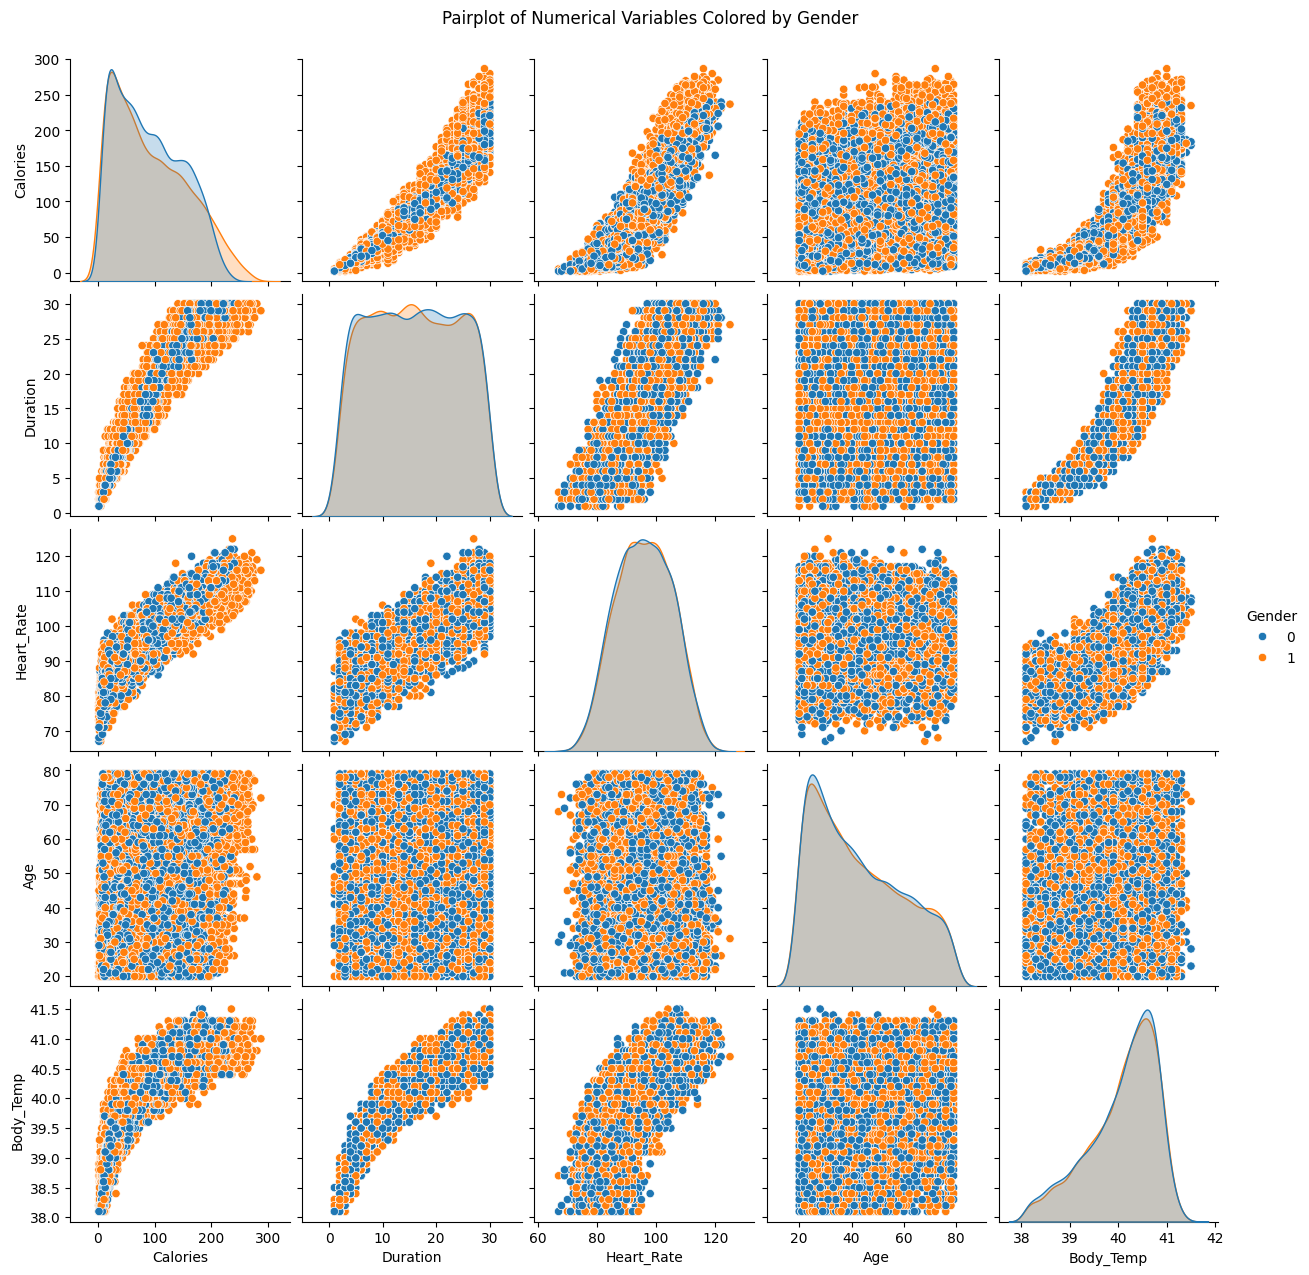

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot: Calories vs. Duration, colored by Gender
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration', y='Calories', hue='Gender', data=df)
plt.title('Calories vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()

# 2. Scatter plot: Calories vs. Heart_Rate, colored by Gender
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Heart_Rate', y='Calories', hue='Gender', data=df)
plt.title('Calories vs. Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Calories')
plt.show()

# 3. Histogram: Distribution of Calories
plt.figure(figsize=(8, 6))
sns.histplot(df['Calories'], kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# 4. Box plot: Calories distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Calories', data=df)
plt.title('Calories Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories')
plt.show()

# 5. Pairplot
numerical_cols = ['Calories', 'Duration', 'Heart_Rate', 'Age', 'Body_Temp']
plt.figure(figsize=(12, 10)) # Adjust figure size for better visibility
sns.pairplot(df[numerical_cols + ['Gender']], hue='Gender')
plt.suptitle('Pairplot of Numerical Variables Colored by Gender', y=1.02) # Add a title
plt.show()

# Summary

## Summary:

### Q&A

* **What is the relationship between Calories and Duration/Heart Rate?**  Calories have a strong positive correlation with both Duration (0.95) and Heart_Rate (0.90).  This suggests that longer exercise durations and higher heart rates are associated with more calories burned.

* **Are there any significant outliers in the dataset?** Yes, outliers were present in several numerical features (Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Calories). These were identified using box plots and subsequently removed using the IQR method.

* **How is Gender distributed in the dataset?**  The 'Gender' column has a nearly even distribution of males and females after conversion to numerical representation.

* **What is the overall impact of outlier removal?** Outlier removal modified the distribution of numerical features, potentially leading to a more representative dataset. The descriptive statistics changed after the removal, reflecting fewer extreme values.

### Data Analysis Key Findings

* **Strong Correlation:**  Calories burned show a strong positive correlation with both Duration (0.95) and Heart_Rate (0.90).
* **Outlier Removal:** Outliers were detected and removed using the IQR method across several numerical features.
* **Gender Distribution:** The dataset has a near-even distribution of male and female participants.
* **Calories and Age:** 'Calories' shows a moderate positive correlation with 'Age' (0.16).


### Insights or Next Steps

* **Model Building:**  Explore predictive modeling techniques (e.g., linear regression) to predict calorie expenditure based on factors like duration, heart rate, and gender. The strong correlations observed suggest good potential for accurate prediction.

* **Further Outlier Analysis:** Investigate the remaining data distribution after outlier removal. Verify if any other forms of data cleaning or transformation are needed, perhaps a more robust outlier removal method, to improve model performance.


# Machine Learning Model

In [10]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import gradio as gr

# Load the dataset
df = pd.read_csv("calories.csv")

# Preprocess the data
df_encoded = pd.get_dummies(df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate']],
                            columns=['Gender'], drop_first=True)

X = df_encoded
y = df['Calories']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction function
def predict_calories(gender, age, height, weight, duration, heart_rate):
    gender_male = 1 if gender.lower() == 'male' else 0
    input_data = pd.DataFrame([[age, height, weight, duration, heart_rate, gender_male]],
                              columns=X.columns)
    prediction = model.predict(input_data)[0]
    return f"Estimated Calories Burned: {prediction:.2f}"

# Gradio interface
interface = gr.Interface(
    fn=predict_calories,
    inputs=[
        gr.Dropdown(choices=["male", "female"], label="Gender"),
        gr.Number(label="Age (years)"),
        gr.Number(label="Height (cm)"),
        gr.Number(label="Weight (kg)"),
        gr.Number(label="Duration (minutes)"),
        gr.Number(label="Heart Rate (bpm)")
    ],
    outputs="text",
    title="Calories Prediction ",
    description="Estimate calories burned using age, height, weight, duration, heart rate, and gender."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e1586ad8790313dac8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
